In [4]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.shape

(545, 13)

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<li> Here the count for all the numerical features is <b>545</b> which is equal to the <b>rows count of the dataset</b>. That means there are no null values in our dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# categorical features

In [6]:
categorical_features=['mainroad','guestroom','basement','prefarea','furnishingstatus','hotwaterheating','airconditioning']

for feat in categorical_features:
    print(df[feat].value_counts())
    print("\n")

mainroad
yes    468
no      77
Name: count, dtype: int64


guestroom
no     448
yes     97
Name: count, dtype: int64


basement
no     354
yes    191
Name: count, dtype: int64


prefarea
no     417
yes    128
Name: count, dtype: int64


furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


hotwaterheating
no     520
yes     25
Name: count, dtype: int64


airconditioning
no     373
yes    172
Name: count, dtype: int64




<li> We see all the categorical features except <b>furnishingstatus</b> has two categories and can be encode with 0 and 1.
<li> <b>furnishingstatus</b> has <b>3 categories</b>. Could be encode as:
<li> unfurnished           ---> 0
<li> semi-furnished        ---> 1
<li> furnished             ---> 2

In [7]:
n_df=df.copy()

In [43]:
n_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [44]:
categorical_features

['mainroad',
 'guestroom',
 'basement',
 'prefarea',
 'furnishingstatus',
 'hotwaterheating',
 'airconditioning']

In [8]:
for feat in categorical_features:
    if feat!='furnishingstatus':
        n_df[feat]=[1 if val=='yes' else 0 for val in n_df[feat].values]

n_df.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,unfurnished


In [9]:
for feat in categorical_features:
    print(n_df[feat].value_counts())
    print("\n")

mainroad
1    468
0     77
Name: count, dtype: int64


guestroom
0    448
1     97
Name: count, dtype: int64


basement
0    354
1    191
Name: count, dtype: int64


prefarea
0    417
1    128
Name: count, dtype: int64


furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


hotwaterheating
0    520
1     25
Name: count, dtype: int64


airconditioning
0    373
1    172
Name: count, dtype: int64




In [10]:
n_df['furnishingstatus'] = n_df['furnishingstatus'].replace({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

n_df['furnishingstatus'].value_counts()

/tmp/ipykernel_7273/1886553100.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  n_df['furnishingstatus'] = n_df['furnishingstatus'].replace({


furnishingstatus
1    227
0    178
2    140
Name: count, dtype: int64

In [48]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [49]:
n_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0


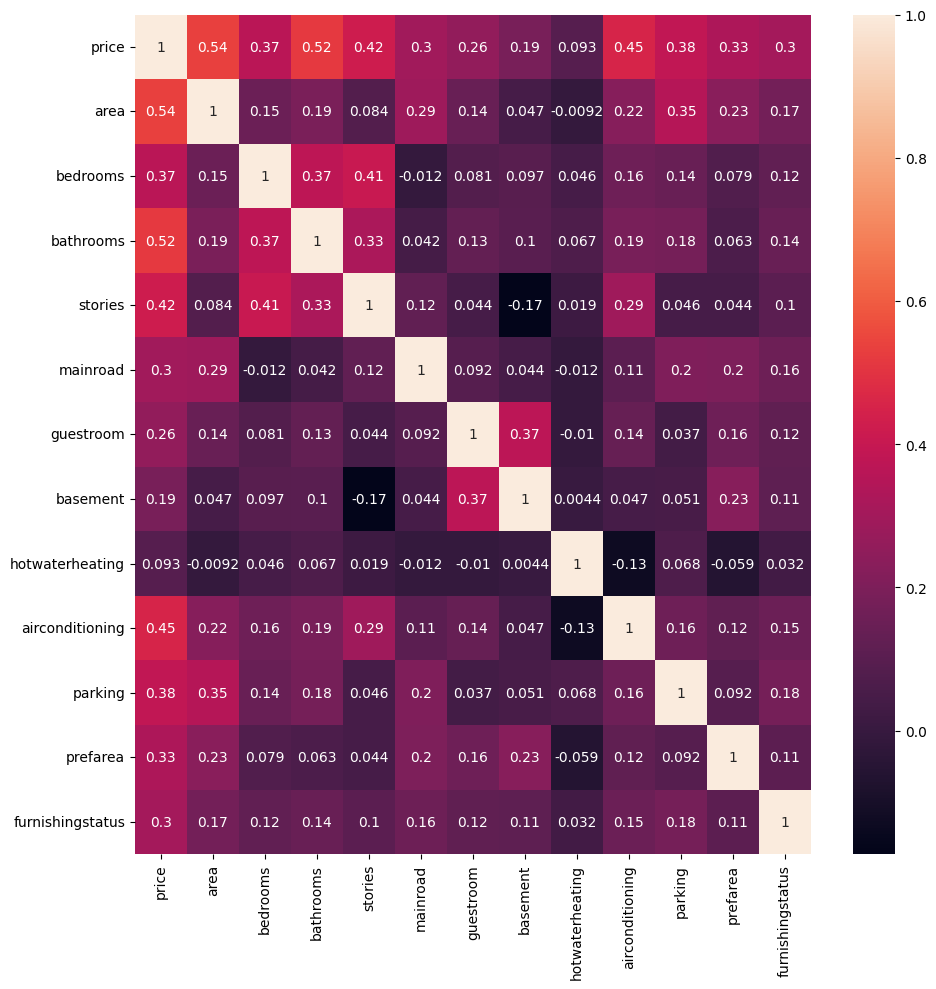

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(n_df.corr(),annot=True)
plt.tight_layout()
plt.show()

In [12]:
# drop multiple features as they are correlated with other independent features
drop_features=['bedrooms','stories','parking','hotwaterheating','prefarea','basement','price']

In [13]:
# Scaling the area column for 0 to 1

def StandardScaler(column):
    n_df[column]=(n_df[column]-n_df[column].mean())/(n_df[column].std())

for column in n_df.columns:
    StandardScaler(column)

n_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,1.404995
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,1.404995
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,0.091578
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,1.404995
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,1.404995


In [87]:

X=torch.tensor(n_df.drop(columns=drop_features).values,dtype=torch.float32)
Y=torch.tensor(n_df['price'].values,dtype=torch.float32).reshape(X.shape[0],1)

X.shape,Y.shape

(torch.Size([545, 6]), torch.Size([545, 1]))

In [88]:
# initializing random weight and bias

W=torch.randn((X.shape[1],1))
b=torch.randn((1,1))

print(W.shape,b.shape)
W.dtype

torch.Size([6, 1]) torch.Size([1, 1])


torch.float32

In [89]:
loss_list=[]

In [90]:
for i in range(1000):
    Y_hat=X@W+b
    
    Loss=1/2*((Y_hat-Y)**2).mean()
    loss_list.append(Loss)

    dL_dy_hat=(Y_hat-Y)/Y.shape[0]
    dy_hat_dW=X
    dL_db=dL_dy_hat.sum()
    dL_dW=dy_hat_dW.T@dL_dy_hat

    W-=0.01*dL_dW
    b-=0.01*dL_db

In [91]:
loss_list[-1]


tensor(0.2046)

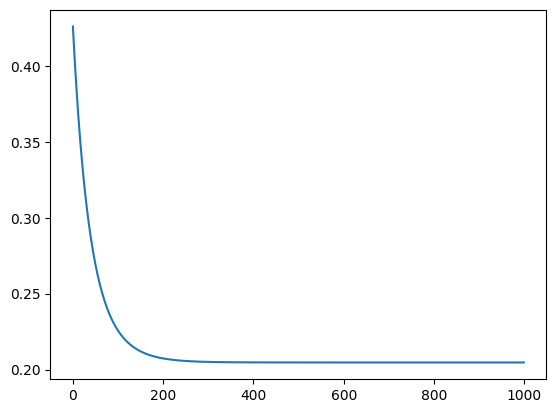

In [94]:
plt.plot(loss_list)

In [95]:
from sklearn.metrics import r2_score

r2_score(Y.numpy(),Y_hat.numpy())

0.5899591445922852

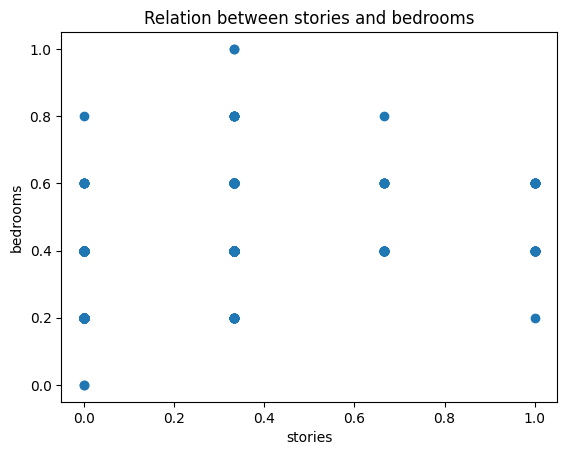

In [47]:
plt.scatter(X[:,3],X[:,1])
n_df.columns[2]
plt.xlabel(n_df.columns[4])
plt.ylabel(n_df.columns[2])

plt.title("Relation between stories and bedrooms")
plt.show()

# Logcoshx Cost funtion

In [14]:
X=torch.tensor(n_df.drop(columns=drop_features).values,dtype=torch.float32)
Y=torch.tensor(n_df['price'].values,dtype=torch.float32).reshape(X.shape[0],1)

X.shape,Y.shape

(torch.Size([545, 6]), torch.Size([545, 1]))

In [15]:
W=torch.randn((X.shape[1],1))
b=torch.randn((1,1))

print(W.shape,b.shape)
W.dtype

torch.Size([6, 1]) torch.Size([1, 1])


torch.float32

In [23]:
loss_list=[]

In [29]:
for i in range(1000):
    Y_hat=X@W+b
    
    Loss=torch.log(torch.cosh(Y_hat-Y)).sum()
    loss_list.append(Loss)

    dL_dy_hat=torch.tanh(Y_hat-Y)
    dy_hat_dW=X
    dL_db=dL_dy_hat.sum()
    dL_dW=dy_hat_dW.T@dL_dy_hat

    W-=0.0001*dL_dW
    b-=0.0001*dL_db

In [30]:
len(loss_list)
# loss_list

2000

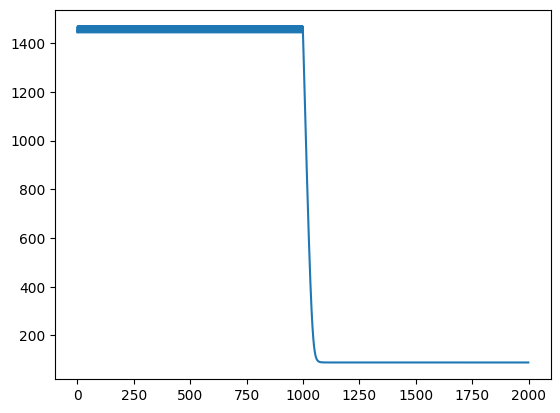

In [31]:
plt.plot(loss_list)